In [1]:
%pylab inline
from IPython.display import Video

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cv2

In [15]:
Video('crash3.mp4')

In [3]:
video = cv2.VideoCapture('crash3.mp4')
length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
width  = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = video.get(cv2.CAP_PROP_FPS)

In [4]:
frames_color = np.zeros((length, height, width, 3), dtype=np.uint8)
frames = np.zeros((length, height, width), dtype=np.uint8)
for i in range(length):
    
    flag, frame = video.read()
    frames_color[i] = frame
    frames[i] = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

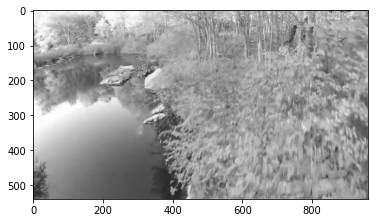

In [5]:
imshow(frames[100], cmap='gray')

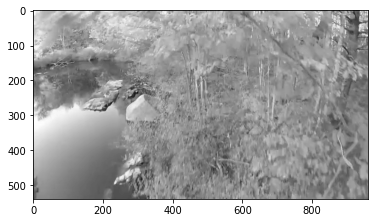

In [6]:
imshow(frames[150], cmap='gray')

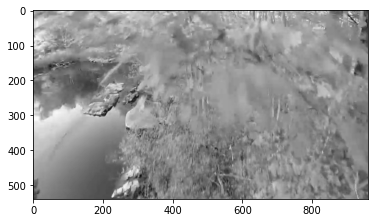

In [7]:
imshow(frames[160], cmap='gray')

In [14]:
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

prev = frames[120]
p0 = cv2.goodFeaturesToTrack(prev, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(prev)
# Create some random colors
color = np.random.randint(0,255,(100,3))


for i in range(120,150):
    prev = frames[i-1]
    current = frames[i]
    
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(prev, current, p0, None, **lk_params)
    
    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new, good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
    
    p0 = good_new.reshape(-1,1,2)

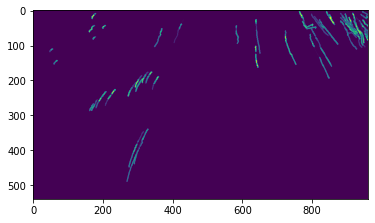

In [16]:
imshow(mask)